In [274]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
#loading and cleaning the data
df=pd.read_csv(r"C:\Users\DELL\Downloads\retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [276]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [277]:
df.info(),df['Date'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


(None,
 0   2023-11-24
 1   2023-02-27
 2   2023-01-13
 3   2023-05-21
 4   2023-05-06
 Name: Date, dtype: datetime64[ns])

In [278]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
#Descriptive Statistics
mean=df.mean(numeric_only=True)
median=df.median(numeric_only=True)
mode=df.mode(numeric_only=True).iloc[0]
std=df.std(numeric_only=True)
mean,median,mode,std

(Transaction ID    500.500
 Age                41.392
 Quantity            2.514
 Price per Unit    179.890
 Total Amount      456.000
 dtype: float64,
 Transaction ID    500.5
 Age                42.0
 Quantity            3.0
 Price per Unit     50.0
 Total Amount      135.0
 dtype: float64,
 Transaction ID     1.0
 Age               43.0
 Quantity           4.0
 Price per Unit    50.0
 Total Amount      50.0
 Name: 0, dtype: float64,
 Transaction ID    288.819436
 Age                13.681430
 Quantity            1.132734
 Price per Unit    189.681356
 Total Amount      559.997632
 dtype: float64)

In [ ]:
#Time series Analysis:Monthly Sales Trend
df.set_index('Date',inplace=True)
monthly_sales=df['Total Amount'].resample('ME').sum()

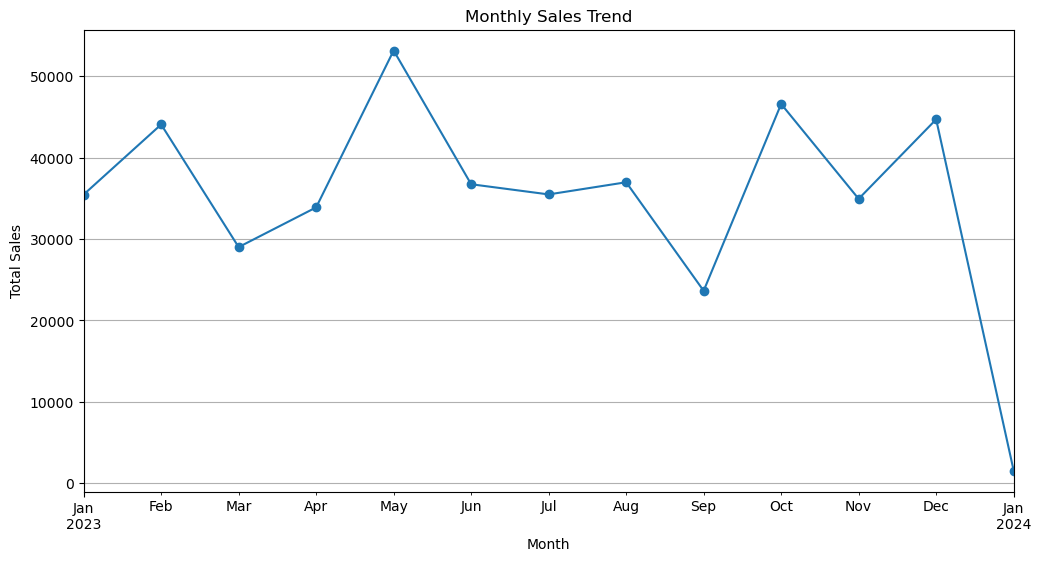

In [285]:
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

In [ ]:
#Customer and Product Analysis
#A.Gender-wise Total Sales
gender_sales=df.groupby('Gender')['Total Amount'].sum()

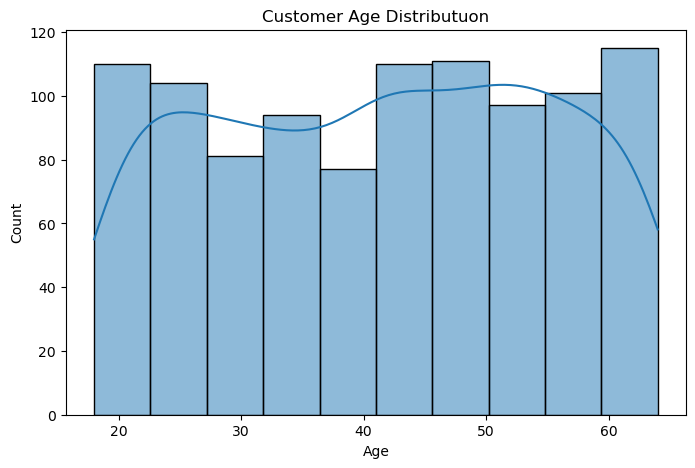

In [ ]:
#B.Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=10,kde=True)
plt.title("Customer Age Distributuon")
plt.xlabel('Age')
plt.show()

In [ ]:
#C.Top Product Categories by Revenue
top_products=df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

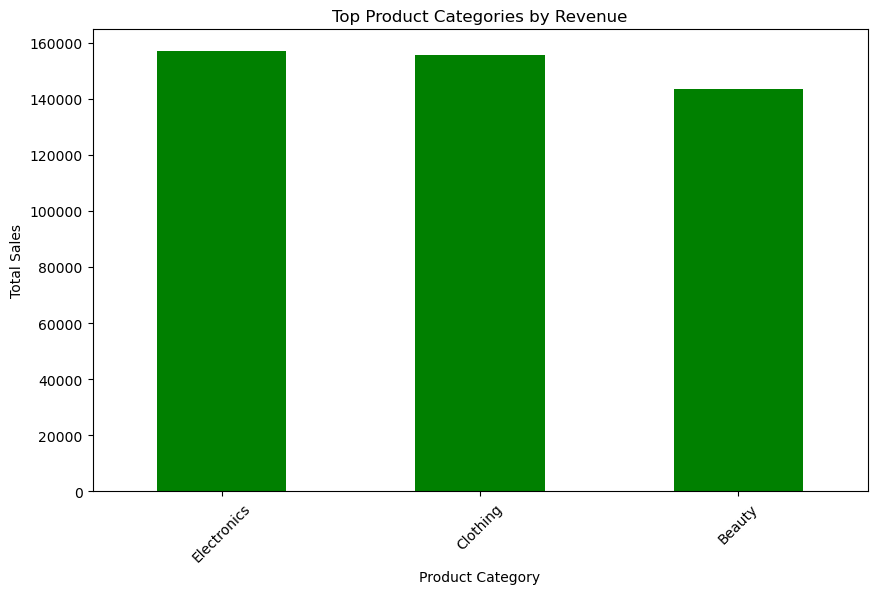

In [301]:
top_products.plot(kind='bar',figsize=(10,6),color='green')
plt.title('Top Product Categories by Revenue')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

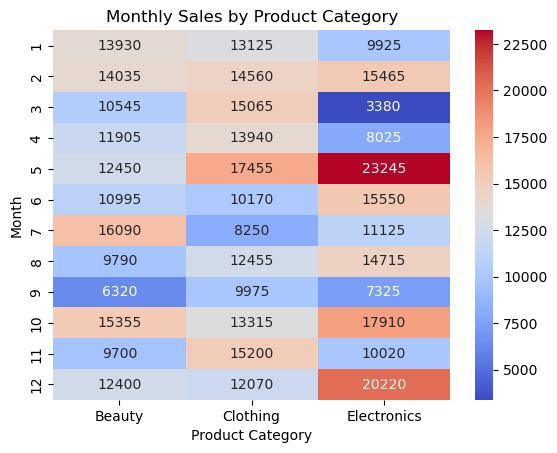

In [302]:
monthly_category_sales=df.groupby([df.index.month,'Product Category'])['Total Amount'].sum().unstack()
sns.heatmap(monthly_category_sales, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Monthly Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()